## Показатели оценки

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#### Предыдущий блок

In [60]:
total_charges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [61]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")
df.TotalCharges = df.TotalCharges.fillna(0)

In [62]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [63]:
df.churn = (df.churn == "yes").astype("int")

In [64]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

X_train = df_train.drop("churn", axis=1)
X_val = df_val.drop("churn", axis=1)

y_train = df_train.churn.values
y_val = df_val.churn.values

In [65]:
# Создадим два массива с котигориальными и числовыми признаками
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [66]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [67]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [68]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [69]:
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [71]:
val_dict = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

churn = y_pred >= 0.5
(y_val == churn).mean()

np.float64(0.8016129032258065)

### Достоверность классификации

Достоверность - самый простой способ оценить классификатор: посчитав уоличесвтво случаев, в которых наша модель оказалась права, мы можем многое узнать о ее поведении и качестве.

Несмотря на то что достоверность легко реализовать самостоятельно, мы можем использовать и существующие реализации. Библиотека sklearn предлагает множество показателей, включая достоверность и м.др., которые будем применять позже. 

Теперь мы можем перебрать различные пороговые значения и выяснить, какое из них дает наилучшую достоверность:

In [72]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 11)

for t in thresholds:
    churn = y_pred >= t
    score = accuracy_score(y_val, churn)
    print(f"{t:.2f}, {score:.3f}")

0.00, 0.261
0.10, 0.595
0.20, 0.690
0.30, 0.755
0.40, 0.782
0.50, 0.802
0.60, 0.790
0.70, 0.774
0.80, 0.742
0.90, 0.739
1.00, 0.739


Как мы видим, использование порога 0.5 дает наилучшую достоверность. Как правило, 0.5 - хорошее начальное пороговое значение, но мы всегда должны пробовать и другие, чтобы убедиться, что 0.5 - действительно лучший выбор.

thresholds = np.linspace(0, 1, 11)Для наглядности используем matplotlib для создания графика, который показывает, как изменяется достоверность в зависимости от порогового значения. 

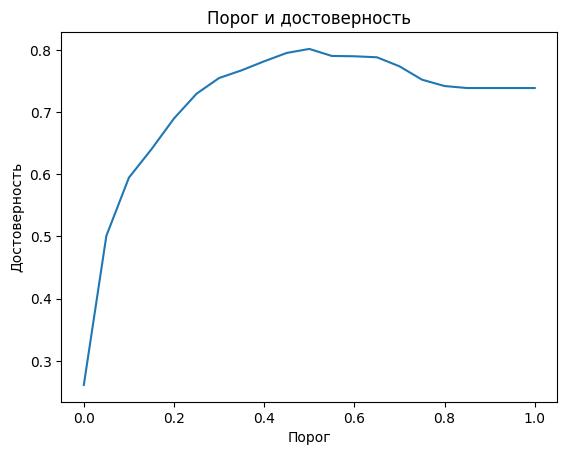

In [73]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    churn = y_pred >= t
    score = accuracy_score(y_val, churn)
    scores.append(score)

plt.plot(thresholds, scores);
plt.title("Порог и достоверность");
plt.xlabel("Порог");
plt.ylabel("Достоверность");
plt.show();

### Фиктивная базовая линия

Данный показатель кажется хорошим, однако чтобы определить, действительно ли 80% - это хорошо, нам следует связать его с чем-то - например, с простой базовой линией, которую легко понять. Одной из таких базовых линий может стать фиктивная модель, которая всегда предсказывает одно и то же значение.

В нашем примере набор данных не сбалансирован, и у нас не так много ушедших пользователей. Таким образом, фиктивная модель всегда может прогнощировать класс большинства - "оттока нет". Другими словами, эта модель всегда будет выдавать False, независимо от признаков. Это не очень полезная модель, но ее можно использовать в качетсве базовой и сравнить с двумя другими.

Создадим этот базовый прогноз:

In [74]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

Теперь проверим достоверность этого базового прогноза с помощью кода, который использовали ранее:

In [75]:
accuracy_score(baseline, y_val)

0.7387096774193549

Получили 0.438. Это означает, что достоверность базовой модели составляет около 74%.

Как видим, малая модель лучше базовой всего на 2%, а большая - на 6%. Если вспомним все те трудности, которые нам пришлось преодолеть, чтобы обучить эту большую модель, то 6% могут показаться не таким уж и значительным приростом по сравнению с фиктивным базовым уровнем.

Прогонзирование оттока - сложная задача, и, возможно, это отличное улучшение. Однако это совсем не очевидно, если использовать только показатель достоверности. Согласно ему наша модель лишь немного лушче фиктивной, которая рассматривает всех клиентов как надежных и не пытается удержать никого из них.

Таким образом, нам нужны дополнительные показатели - другие сопосбы измерения качества нашей модели. Эти показатели основаны на матрице ошибок.

### Матрица ошибок

В случае, когда у нас дисбаланс классов, требуются другие способы измерения качества моделей. Для этого имеется несколько вариантов, и большинство из них основаны на матрице ошибок: таблице, которая в сжатой форме представляет все возможные результаты ля прогнозов нашей модели.

Когда мы делаем прогноз, он оказывается либо верным, либо нет:

- если мы прогнозируем "отток", то клиент может действительно уйти, а может и остаться;
- если мы прогнозируем "без оттока", то вполне вероятно, что клиент действительно не уйдет, но возможно и то, что в действительности он расторгнет договор.

Таким образом, мы получаем четыре возможных результата:

- мы предсказываем False, и ответ оказывается False; *истинно отрицательный (TN)*
- мы предсказываем False, и ответ оказываетя True;  *ложно отрицательный (FN)*
- мы предсказываем True, и ответ оказываетя False; *ложно положительный (FP)*
- мы предсказываем True, и ответ оказываетя True; *истинно положительный (TP)*

Две из этих ситуаций - первая и последняя - хорошие: прогноз соотвествует фактическому значению.

Чтобы представлять эти результаты более наглядно, полезно расположить их в таблице. Мы можем поместить предсказанные классы в столбцы, а фактические в строки.

<img src="ConfussionMatrix.png" width="40%" style="margin: 0 auto">

In [76]:
from sklearn.metrics import confusion_matrix

t = 0.5
churn = y_pred >= t
confusion_matrix(y_val, churn)

array([[1202,  172],
       [ 197,  289]])

In [77]:
confusion_matrix(y_val, churn) / confusion_matrix(y_val, churn).sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

Обобщим результаты в таблице и видим, что модель хорошо прогнозирует отрицательные значения: 65% прогнозов - истинно отрицательные. Однако, она допускает довольно много ошибок обоих типов (9 и 11% соответсвенно).


Таблица дает нам лучшее представление о производительности модели - теперь легко разибть производительность на различные компоненты и понять, где модель допускает ошибки. На самом деле мы видим, что производительность модели не слишком велика: она допускает довольно много ошибок при попытке идентифицировать пользователей, которые планируют уйти. Это то, чего мы не смогли бы узнать, используя только показатель достоверности (accuracy).

#### Точность и отклик

Достоверность может ввести в заблуждение при работе с несбалансированными наборами данных. В подобных случаях полезно использовать другие показатели: точность и отклик.

**Точность** - сообщает нам, сколько положительных прогнозов оказались верными. Это доля правильно прогнозированных положительных примеров. (каков процент правильных прогнозов среди клиентов с прогнозом "отток")
$$ P = \frac{TP}{TP + FP} $$

**Отклик** - доля праивльно класссифцированных положительных примеров среди всех положительных примеров. (каков процент правильных прогнозов "оттока" среди всех клиентов "оттоком")
$$R = \frac{TP}{TP + FN}$$

<img src="Recall-Precision.png" style="margin: 0 auto; width: 70%;">